In [21]:
from __future__ import division
import requests
from lxml import html
import time
from bs4 import BeautifulSoup # For HTML parsing
import urllib2 # Website connections
import re # Regular expressions
from time import sleep # To prevent overwhelming the server between connections
from collections import Counter # Keep track of our term counts
from nltk.corpus import stopwords # Filter out stopwords, such as 'the', 'or', 'and'
import pandas as pd # For converting results to a dataframe and bar chart plots
from collections import Counter, defaultdict
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
one_grams = pickle.load(open('one_grams_data_scientist_data_analyst.pkl','rb'))
two_grams = pickle.load(open('two_grams_data_scientist_data_analyst.pkl','rb'))
one_grams = one_grams[:-1]
two_grams = two_grams[:-1]

In [62]:
search_terms  = ['"data scientist"', '"data analyst"']

In [4]:
one_gram_counter = Counter()
two_gram_counter = Counter()
for job_title in one_grams:
    one_gram_counter.update(job_title.keys())
for job_title in two_grams:
    two_gram_counter.update(job_title.keys())

        

In [5]:
# get average counts for comparison
# probably a better way to do this with map reduce. 
one_gram_avg = defaultdict(int)
two_gram_avg = defaultdict(int)
for job_title in one_grams:
    for key,val in job_title.iteritems():
        one_gram_avg[key] += val/one_gram_counter[key]

for job_title in two_grams:
    for key,val in job_title.iteritems():
        two_gram_avg[key] += val/two_gram_counter[key]


In [64]:
comparison_dfs_one = [[] for i in one_grams]
tf_rtf_one = [dict() for i in one_grams] 

for i in range(len(one_grams)):
    for key in one_grams[i].keys():
        tf_rtf_one[i][key] = ((one_grams[i][key] - one_gram_avg[key]))
    comparison_dfs_one[i] = pd.DataFrame(tf_rtf_one[i].items(), columns=['term','value'])
    comparison_dfs_one[i].sort_values(by='value',ascending=False, inplace=True)
    comparison_dfs_one[i]['value'] = comparison_dfs_one[i]['value'] / comparison_dfs_one[i]['value'].max()


In [65]:
comparison_dfs_two = [[] for i in two_grams]
tf_rtf_two = [dict() for i in two_grams] 
for i in range(len(two_grams)):
    for key in two_grams[i].keys():
        tf_rtf_two[i][key] = (two_grams[i][key] - two_gram_avg[key])
    comparison_dfs_two[i] = pd.DataFrame(tf_rtf_two[i].items(), columns=['term','value'])
    comparison_dfs_two[i].sort_values(by='value',ascending=False, inplace=True)
    comparison_dfs_two[i]['value'] = comparison_dfs_two[i]['value'] / comparison_dfs_two[i]['value'].max()


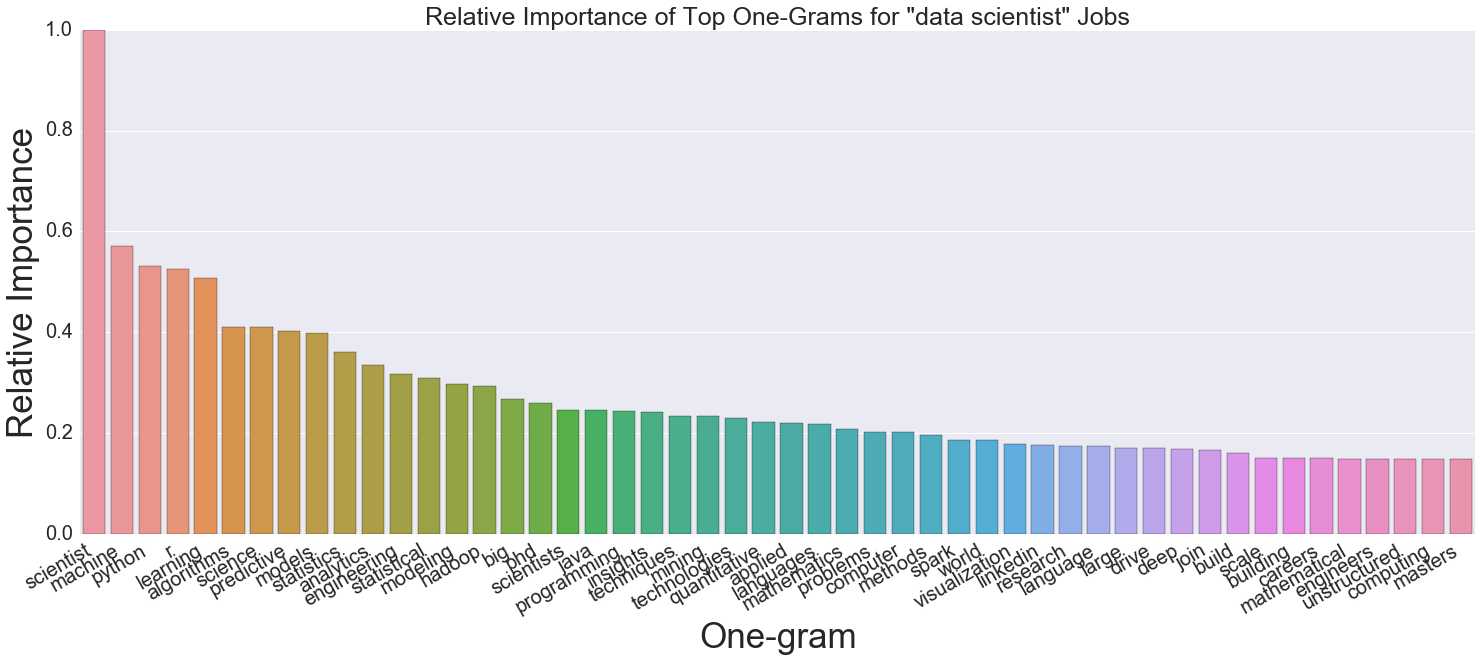

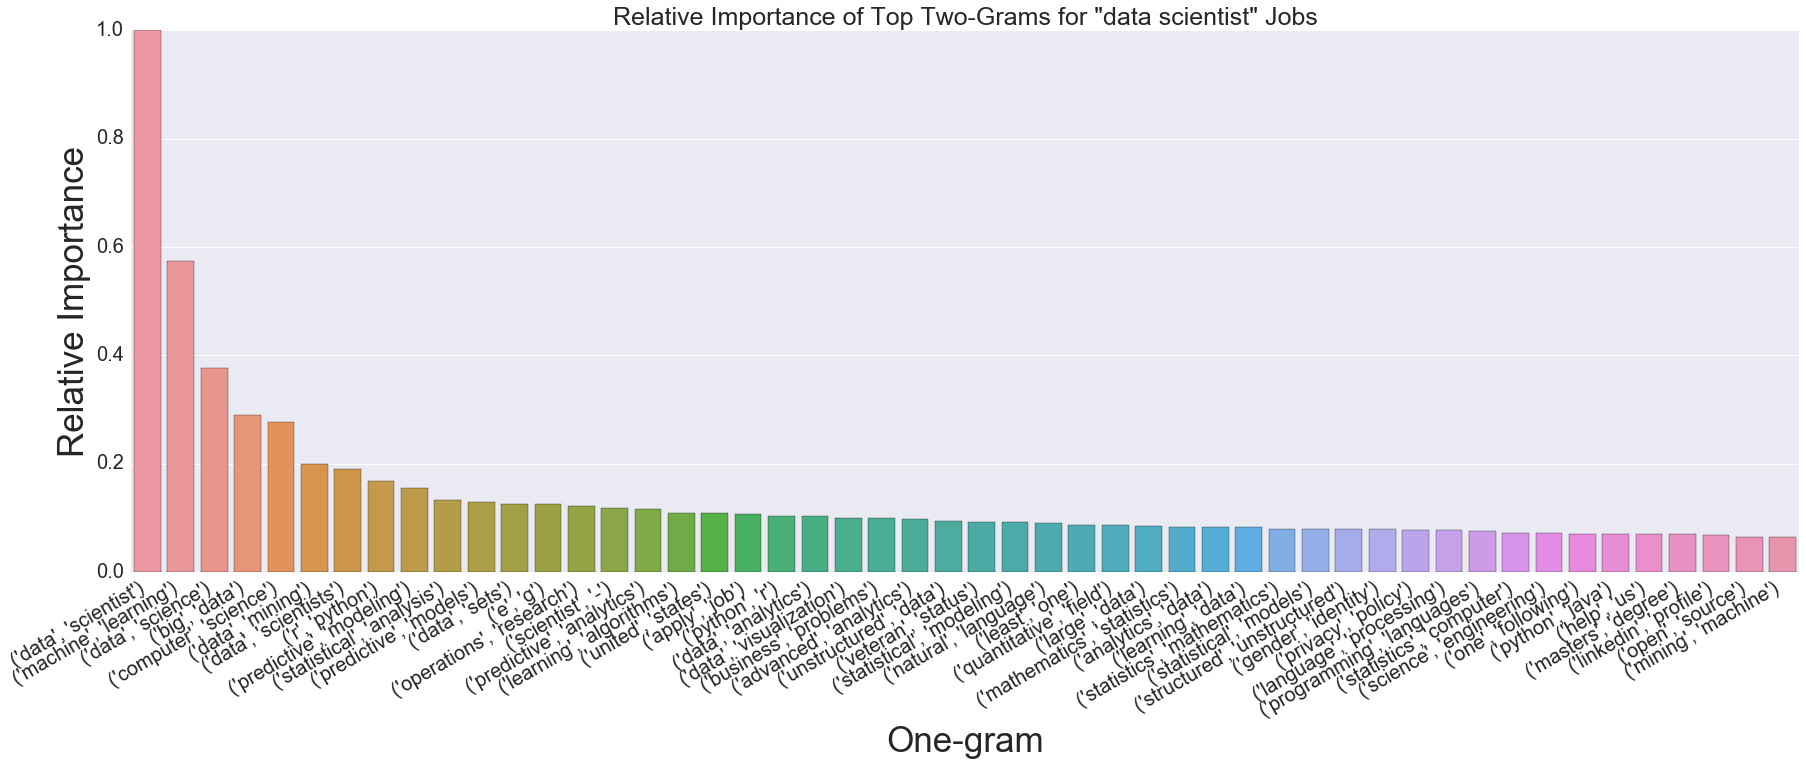

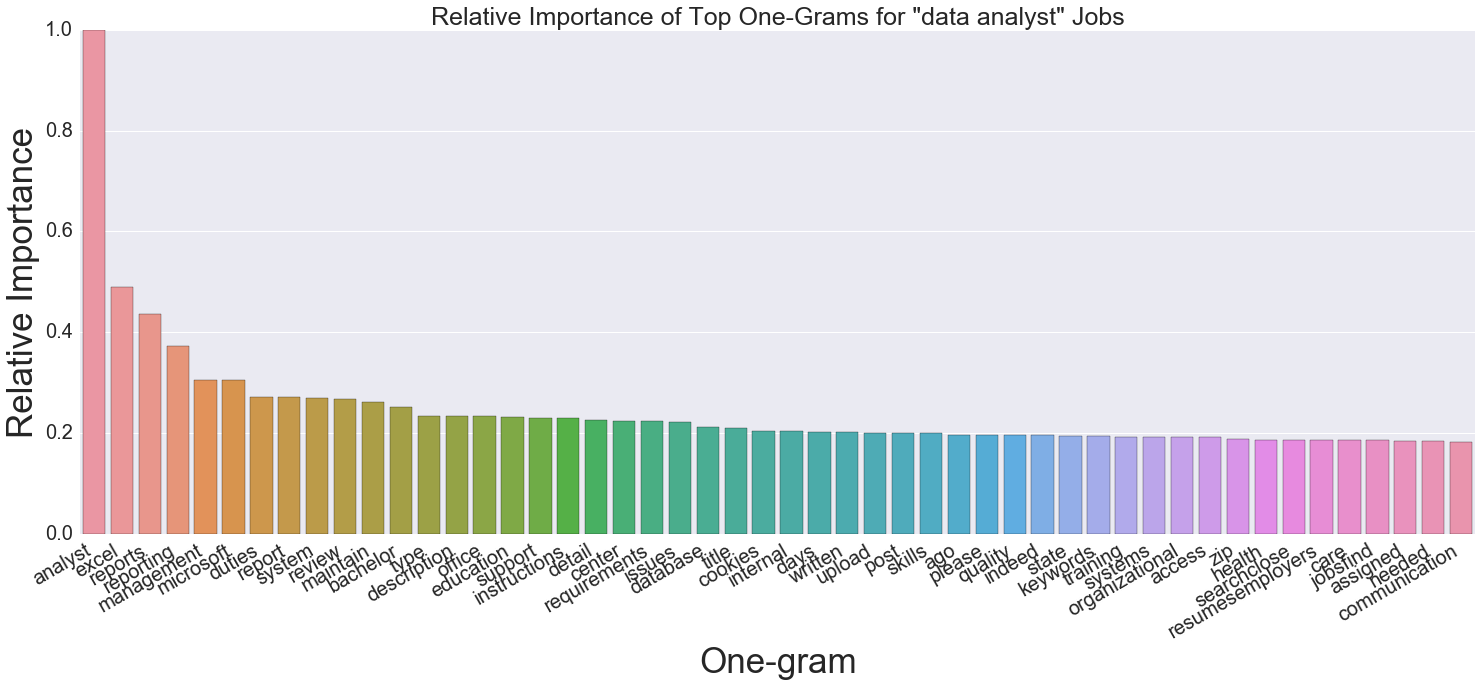

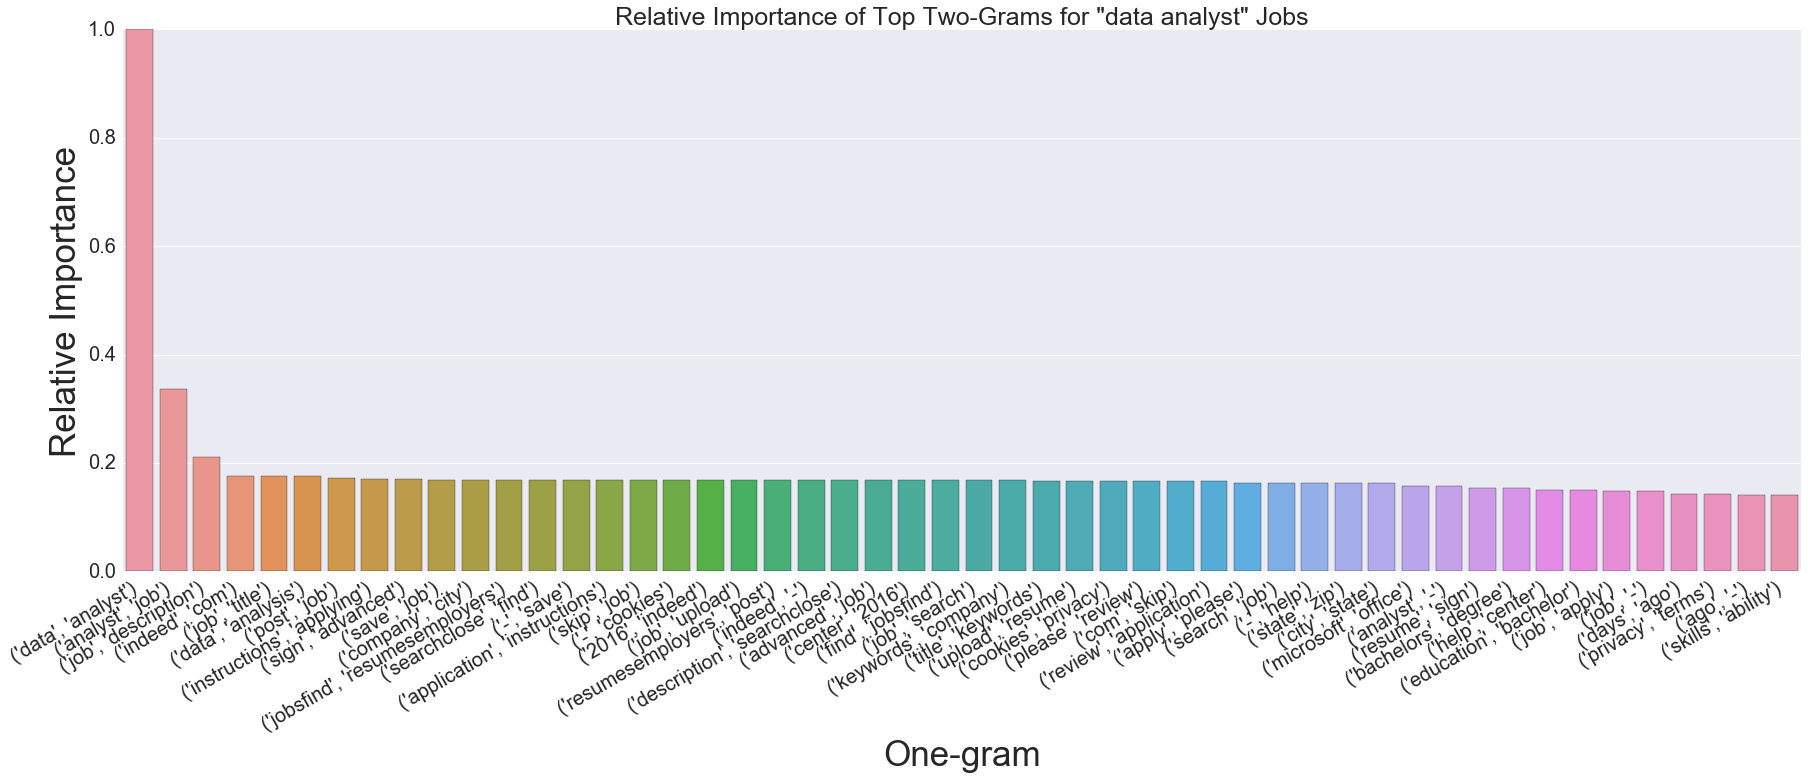

In [68]:
top_x = 50
for i, job_title in enumerate(search_terms):
    
    fig, ax = plt.subplots(figsize=(25,10))
    myplot = sns.barplot(comparison_dfs_one[i]['term'].values[:top_x],comparison_dfs_one[i]['value'].values[:top_x],ax=ax)
    plt.ylabel('Relative Importance', size=35)
    plt.xlabel('One-gram', size=35)
    plt.xticks(rotation=60, size=20)
    plt.yticks(size=20)
    plt.title('Relative Importance of Top One-Grams for {} Jobs'.format(job_title), size=25)
    fig.autofmt_xdate()
    
    fig, ax = plt.subplots(figsize=(25,10))
    myplot = sns.barplot(comparison_dfs_two[i]['term'].values[:top_x],comparison_dfs_two[i]['value'].values[:top_x],ax=ax)
    plt.ylabel('Relative Importance', size=35)
    plt.xlabel('One-gram', size=35)
    plt.xticks(rotation=60, size=20)
    plt.yticks(size=20)
    plt.title('Relative Importance of Top Two-Grams for {} Jobs'.format(job_title), size=25)
    plt.tight_layout()
    fig.autofmt_xdate()




